In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB

In [2]:
data = datasets.load_iris()

In [5]:
X = data['data']
y = data['target']

In [7]:
pd.DataFrame(np.hstack((X,y.reshape(-1,1))), 
             columns=data['feature_names']+["Target"])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [9]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [10]:
model.predict_proba(X[:10])

array([[1.00000000e+00, 2.04753955e-17, 1.14577083e-27],
       [1.00000000e+00, 1.93061051e-16, 2.93204278e-27],
       [1.00000000e+00, 2.02223595e-17, 3.52079530e-28],
       [1.00000000e+00, 1.84716187e-16, 3.60579298e-27],
       [1.00000000e+00, 7.58120821e-18, 4.90880459e-28],
       [1.00000000e+00, 2.36902155e-13, 1.29284988e-22],
       [1.00000000e+00, 1.57417725e-16, 5.68266612e-27],
       [1.00000000e+00, 8.59168655e-17, 4.22159374e-27],
       [1.00000000e+00, 1.28045851e-16, 1.26708019e-27],
       [1.00000000e+00, 4.55853121e-17, 1.00799822e-27]])

In [11]:
y_pred = model.predict(X_train)
y_pred[:10]

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1])

In [12]:
model.score(X, y)

0.9533333333333334

In [13]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

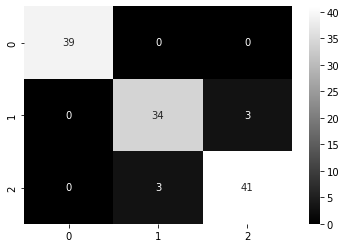

In [14]:
sns.heatmap(cm, annot=True, cmap='gray');

In [15]:
y_pred2 = model.predict(X_test)
print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred))
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred2))

Accuracy Train: 0.95
Accuracy Test: 0.9666666666666667


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

nbm = GaussianNB()
# No train anymore!
m = cross_val_score(nbm, X_train, y_train, cv=10)
m

array([1.        , 0.91666667, 0.83333333, 1.        , 0.91666667,
       1.        , 1.        , 1.        , 0.91666667, 0.91666667])

In [17]:
m.mean()

0.9499999999999998